In [7]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
import matplotlib.pyplot as plt


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.1399812  0.16164718
  0.2308388

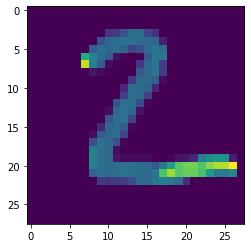

In [13]:

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1
print(x_test[1])
plt.imshow(x_test[1])
plt.show()


In [5]:

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy


model.save('epic_num_reader.model')


Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2651 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1051 - accuracy: 0.9668
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.1094 - accuracy: 0.9656
0.10936467349529266
0.9656000137329102
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


[[8.7959691e-08 8.9922366e-08 7.9058176e-05 ... 9.9987817e-01
  6.4281409e-08 1.1081338e-06]
 [1.0106492e-09 1.1637013e-04 9.9967217e-01 ... 8.7277137e-09
  4.8316392e-06 7.9168269e-12]
 [3.4773331e-07 9.9990451e-01 8.2859533e-06 ... 1.7639619e-05
  2.0826079e-05 5.8424274e-07]
 ...
 [2.4468985e-08 2.2050365e-06 2.6496473e-06 ... 1.7185661e-05
  6.6953784e-05 2.7124846e-04]
 [1.1936796e-06 1.6093129e-05 1.2544432e-06 ... 1.7940422e-06
  4.4466481e-03 1.9214809e-07]
 [4.2429008e-07 1.2660886e-08 8.9325978e-09 ... 1.0247457e-10
  3.6427451e-07 2.5185460e-09]]
2


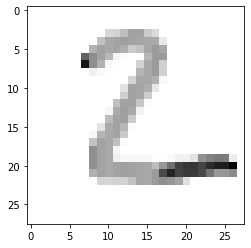

In [14]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)
import numpy as np

print(np.argmax(predictions[1]))

plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()